## Observations and Insights 

In [178]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [23]:
# Checking the number of mice.
combined_data["Mouse ID"].nunique()

249

In [36]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID']
duplicate_mice

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [39]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_combined_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]
clean_combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [40]:
# Checking the number of mice in the clean DataFrame.
clean_combined_data["Mouse ID"].nunique()

248

## Summary Statistics

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
grouped_regimen = clean_combined_data.groupby("Drug Regimen")

grouped_regimen_mean = grouped_regimen['Tumor Volume (mm3)'].mean()
grouped_regimen_median = grouped_regimen['Tumor Volume (mm3)'].median()
grouped_regimen_variance = grouped_regimen['Tumor Volume (mm3)'].var()
grouped_regimen_stdev = grouped_regimen['Tumor Volume (mm3)'].std()
grouped_regimen_sem = grouped_regimen['Tumor Volume (mm3)'].sem()

In [42]:
regimen_statistics_df = pd.DataFrame({'Mean': grouped_regimen_mean, 'Median': grouped_regimen_median,
                                   'Standard Deviation': grouped_regimen_stdev, 'SEM': grouped_regimen_sem})
regimen_statistics_df

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


## Bar and Pie Charts

In [83]:
# Find total mouse count per Drug Regiment
mouse_count = grouped_regimen["Mouse ID"].nunique()
mouse_count

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

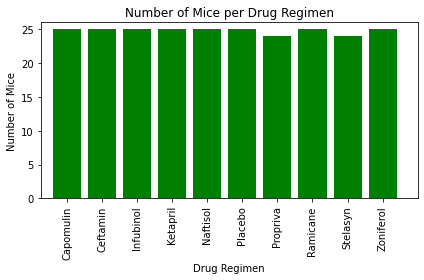

In [86]:
# Generate a bar plot showing the total number of mice for each treatment to decide whether the study was fair - using pyplot.
x_value = clean_combined_data["Drug Regimen"].unique()
sorted_x_value = sorted(x_value)
y_value = mouse_count
tick_locations = [value for value in x_value]

plt.bar(sorted_x_value, mouse_count, align='center', color = "green")

# Set x and y limits
plt.xlim(-0.75, len(sorted_x_value))
plt.ylim(0, max(mouse_count) + 1)

 # Set a Title and labels
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(tick_locations, x_value, rotation="vertical")

plt.tight_layout()

In [87]:
#Create new Data Frame so that graph can be generated using pandas
mouse_and_drugs_df = pd.DataFrame(mouse_count)
#mouse_and_drugs_df = pd.DataFrame(clean_combined_data["Drug Regimen"].value_counts())

mouse_and_drugs_df 

,Mouse ID
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,24
Ramicane,25
Stelasyn,24


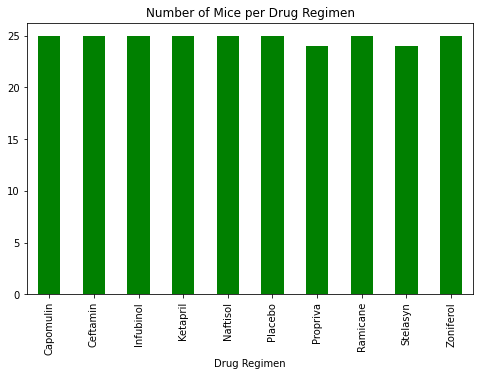

<Figure size 432x288 with 0 Axes>

In [156]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
mouse_and_drugs_df .plot(kind="bar", figsize=(8,5), legend=False, color = "green")
# Set a title for the chart
plt.title("Number of Mice per Drug Regimen")

plt.show()
plt.tight_layout()

In [91]:
#Check how many males and females there are
grouped_mice = clean_combined_data.groupby("Sex")
gender_check = grouped_mice["Mouse ID"].nunique()
gender_check

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

(-1.104514444557683, 1.100214973550366, -1.10849228033437, 1.2068306581091843)

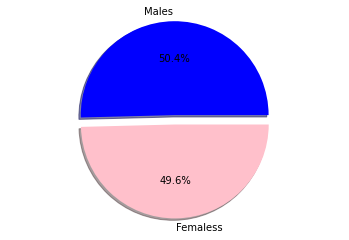

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Males", "Femaless"]

# The values of each section of the pie chart
sizes = [125, 123]

# The colors of each section of the pie chart
colors = ["blue", "pink"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True)
plt.axis("equal")

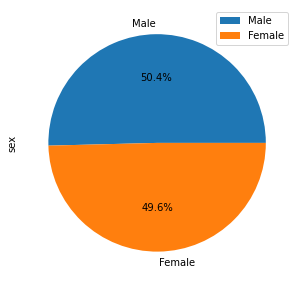

In [93]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df = pd.DataFrame({'sex': [125, 123]
                      },
                  index=['Male', 'Female'])
gender_plot = sex_df.plot.pie(y='sex', figsize=(5, 5), autopct='%1.1f%%')


## Quartiles, Outliers and Boxplots

In [94]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = pd.DataFrame(clean_combined_data.groupby('Mouse ID')['Timepoint'].max()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
greatest_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = pd.merge(combined_data, greatest_timepoint_df, on='Mouse ID')
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [95]:
# Put treatments into a list for a for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on specified drug and get the tumor volumes
for x in treatments:
    
    top_drug_df = merged_data.loc[merged_data['Drug Regimen'] == x]

    # add subset dataframes that contains only the final timepoint for each regimen
    final_timepoint_df = top_drug_df.loc[top_drug_df['Timepoint'] == top_drug_df['max_timepoint']]
    
    # Create a series that consists of all final volume values for each regimen
    tumor_values = final_timepoint_df['Tumor Volume (mm3)']
    tumor_data.append(tumor_values)
    

    # Calculate and print the interquartile range for each regimen
    quartiles = tumor_values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {x}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {x}: {lower_bound}')
    print(f'Upper Bound for {x}: {upper_bound}')
    
    # Determine outliers using upper and lower bounds
    outliers_count = (tumor_values.loc[(final_timepoint_df['Tumor Volume (mm3)'] >= upper_bound) | (final_timepoint_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {x} outliers: {outliers_count}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


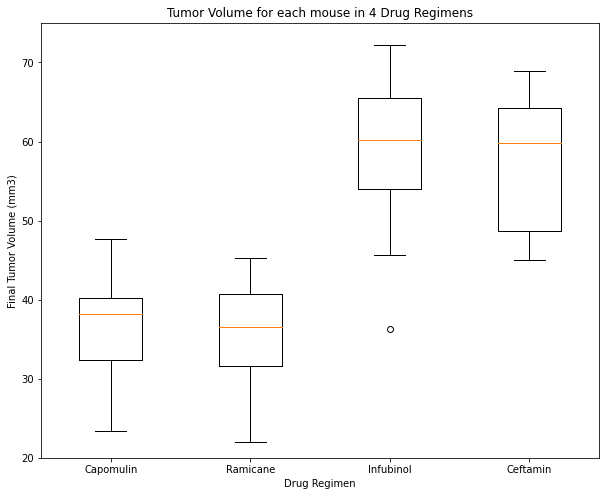

In [169]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots(figsize=(10, 8))

ax1.boxplot(tumor_data, labels=treatments)

ax1.set_title('Tumor Volume for each mouse in 4 Drug Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

plt.ylim(20, 75)

plt.show()

## Line and Scatter Plots

In [133]:
# Find mouse in Capomulin Drug Regimen
capomulin_df = clean_combined_data.loc[clean_combined_data["Drug Regimen"] == "Capomulin",:]
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [140]:
# Create new data frame of mouse s185 for easy plotting
mouse_s185_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
mouse_s185_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


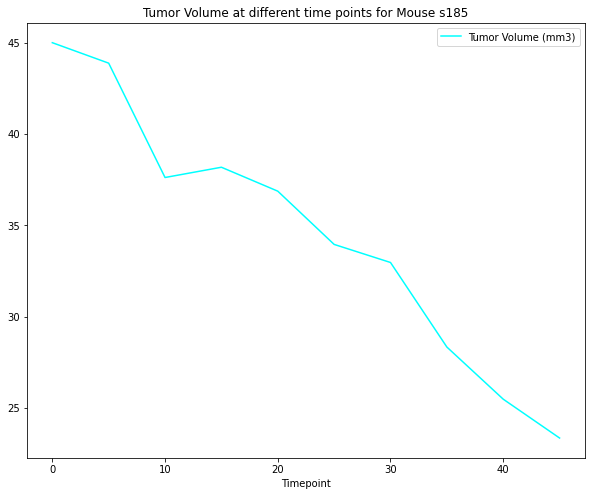

In [167]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_s185_plot = mouse_s185_df.plot.line(x = "Timepoint", y = "Tumor Volume (mm3)", color = "cyan" , figsize=(10,8))

plt.title("Tumor Volume at different time points for Mouse s185")
mouse_s185_plot

In [146]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Get mean for all mouse values in Capomulin regimen
capomulin_means =capomulin_df.groupby(['Mouse ID']).mean()
capomulin_means

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


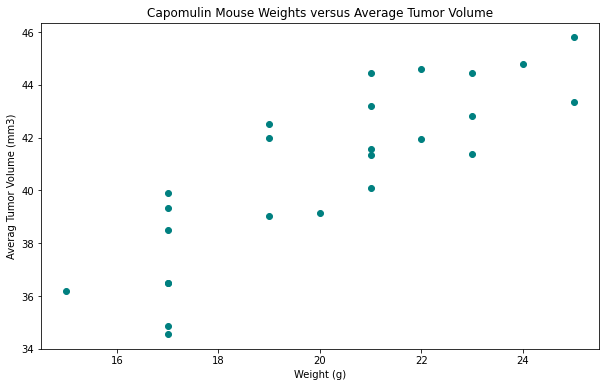

In [166]:
# Plot graph
fig1, ax1 = plt.subplots(figsize=(10, 6))
plt.scatter(capomulin_means["Weight (g)"], capomulin_means["Tumor Volume (mm3)"], color = "teal")
plt.title("Capomulin Mouse Weights versus Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

In [170]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = capomulin_means.iloc[:,1]
ave_tumor = capomulin_means.iloc[:,3]
correlation = st.pearsonr(mouse_weight, ave_tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


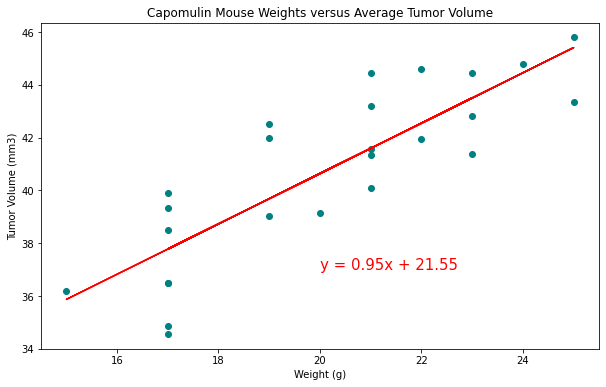

In [194]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_means["Weight (g)"]
y_values = capomulin_means["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(10, 6))
plt.scatter(x_values,y_values, color = "teal")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Mouse Weights versus Average Tumor Volume")

plt.show()